Models:
1. P.C.A
2. Neural Network

1. P.C.A

In [20]:
# import all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# load the dataset
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(cancer['DESCR'])
print(cancer['target_names'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [12]:
data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# scal the data
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [22]:
# create a model
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [25]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'Second principal component')

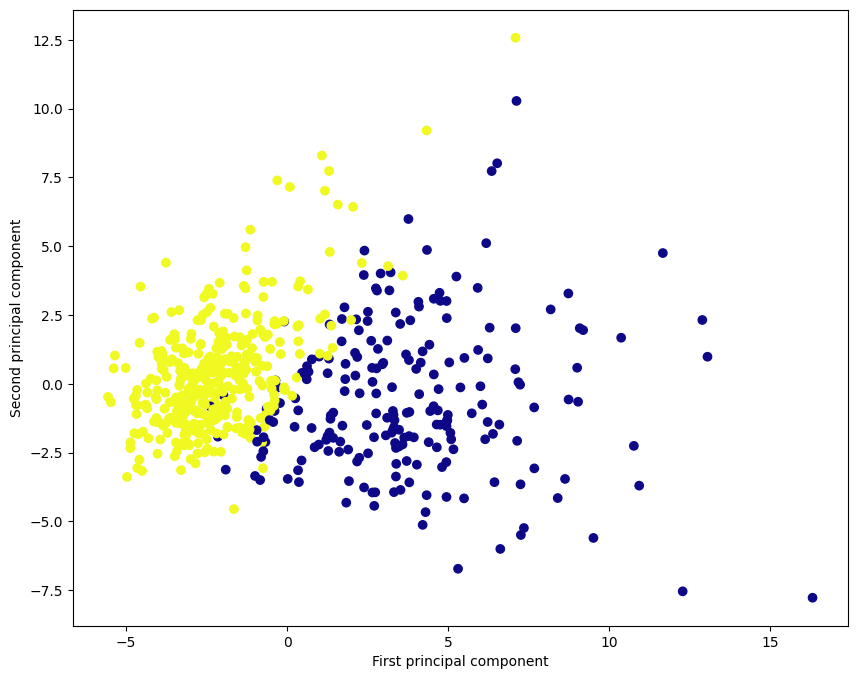

In [29]:
# plot the graph for the data
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma ')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<Axes: >

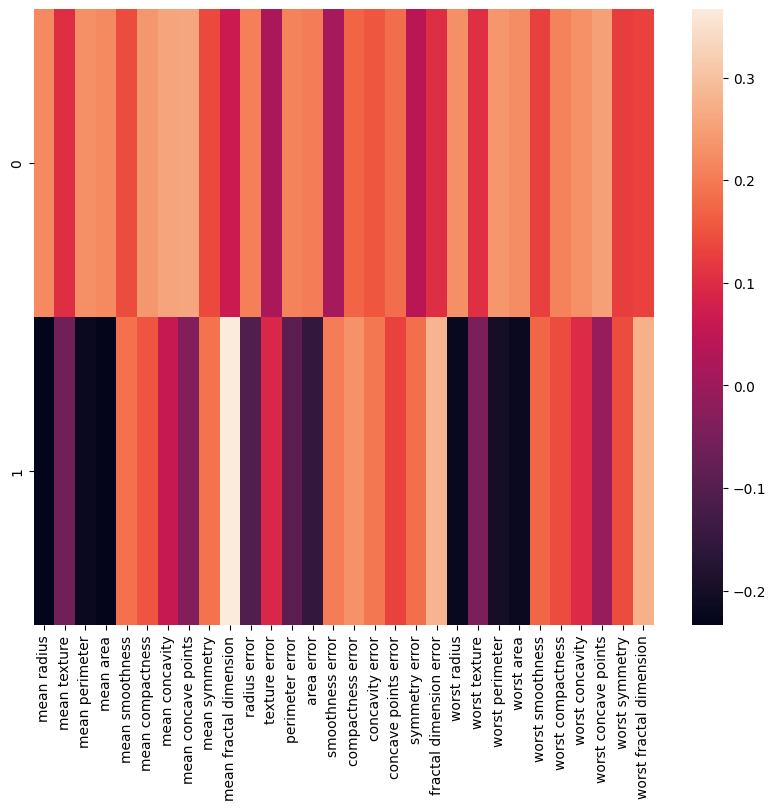

In [32]:
# plot a heat map of the pca components
data_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(10,8))
sns.heatmap(data_comp)

2. Neural Network

In [24]:
# import all the module
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras.utils as image
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [5]:
# initialising the cnn
classifier1 = Sequential()

# convolution
classifier1.add(Conv2D(32, (3 ,3), input_shape=(64, 64, 3), activation='relu'))

# adding a second convolution layer
classifier1.add(Conv2D(32, (3,3), activation='relu'))

# pooling
classifier1.add(MaxPooling2D(pool_size= (2, 2)))

In [6]:
# flattening
classifier1.add(Flatten())

# full connection
classifier1.add(Dense(units=128, activation='relu'))
classifier1.add(Dense(units=1, activation='sigmoid'))


In [7]:
# compiling the cnn
classifier1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=(1./255), shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory('./Neural Network/training_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=(1./255), shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_set = test_datagen.flow_from_directory('./Neural Network/test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
# training the model and displaying the validation accuracy
history = classifier1.fit(training_set, epochs=2, validation_data= test_set, validation_steps=10)

Epoch 1/2
250/250 [==============================] - 127s 508ms/step - loss: 0.4077 - accuracy: 0.8129 - val_loss: 0.4732 - val_accuracy: 0.7781
Epoch 2/2
250/250 [==============================] - 91s 363ms/step - loss: 0.3906 - accuracy: 0.8177 - val_loss: 0.5396 - val_accuracy: 0.7688


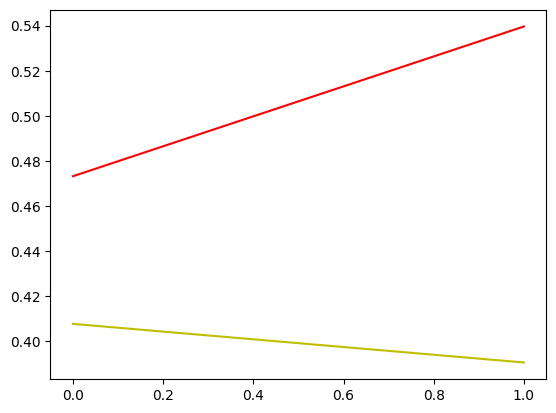

In [26]:
plt.plot(history.history['loss'], c='y')
plt.plot(history.history['val_loss'], c='r')
plt.show()

In [8]:
# # Save the model
# classifier.save('Neural Network classifier for ca.h5')

In [25]:
# make new prediction
test_image = image.load_img('./Neural Network/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier1.predict(test_image)
if result[0, 0] == 0:
    print("It is a cat")
else:
    print("It is a dog")

1/1 [==============================] - 0s 23ms/step
It is a dog


In [1]:
classifier.loss()

NameError: name 'classifier' is not defined